In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import csv
import json
from sklearn.model_selection import train_test_split

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')

#'Clothing_Shoes_and_Jewelry_5',

In [3]:
datasets = ['All_Beauty_5', 'AMAZON_FASHION_5', 'Arts_Crafts_and_Sewing_5', 'Clothing_Shoes_and_Jewelry_5', 'Luxury_Beauty_5']

for i in datasets:
    input_file = f'D:/aml_data/{i}.json'
    output_file = f'D:/aml_data/{i}.csv'

    with open(input_file, "r", encoding="utf-8") as input_json, open(output_file, "w", encoding="utf-8") as output_csv:
        csv_writer = csv.writer(output_csv)
        flag = 0
        for line in input_json:
                dic = json.loads(line)
                if flag == 0:
                    csv_writer.writerow(dic.keys())
                    flag = 1
                csv_writer.writerow(dic.values())

print("Done")

Done


In [3]:
df_train = pd.concat([df_1, df_2, df_3, df_4], axis=0, ignore_index=True)
df_train = df_train.dropna()
df_test = df_test.dropna()

df_train = df_train[df_train["overall"] != '3']
df_train["label"] = df_train["overall"].apply(lambda rating : 1 if str(rating) > '3' else 0)

df_test = df_test[df_test["overall"] != '3']
df_test["label"] = df_test["overall"].apply(lambda rating : 1 if str(rating) > '3' else 0)

In [4]:
print(f'First review = {df_train.loc[0, "reviewText"]}')
print(f'First review has length = {len(df_train.loc[0, "reviewText"])}\n ')
print(f'First review overall rating = {df_train.loc[0, "overall"]}')
print(f'First review binary rating = {df_train.loc[0, "label"]}')

First review = As advertised. Reasonably priced
First review has length = 32
 
First review overall rating = 5.0
First review binary rating = 1


In [5]:
print("TensorFlow Version:", tf.__version__)

# Check available GPUs
gpus = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpus))
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

TensorFlow Version: 2.9.1
Num GPUs Available:  1
Name: /physical_device:GPU:0   Type: GPU


In [6]:
X = pd.DataFrame(df_train, columns = ["reviewText"])
y = pd.DataFrame(df_train, columns = ["label"])

train_x, val_x, train_y, val_y = train_test_split(X, y, train_size=0.8, random_state=50, shuffle=True)

In [7]:
df_Xtrain = pd.DataFrame(train_x,columns=['reviewText'])
df_ytrain = pd.DataFrame(train_y,columns=['label'])
df_train = pd.concat([df_ytrain, df_Xtrain], axis=1)
df_Xval = pd.DataFrame(val_x,columns=['reviewText'])

In [8]:
print(len(df_train))
print(len(df_Xval))

print(df_train.head())
print(df_Xval.head())

8111964
2027992
         label                reviewText
2567756      1           Nice sunglasses
6585046      1            Fits perfectly
7522833      0  You get what you pay for
1465266      1              Soft leather
6909483      1                Five Stars
                       reviewText
7259421  Durable and Easy to Move
8237271      I Love these sandals
6135424                Five Stars
4290872                Five Stars
9102221      A Very Good T- shirt


**Train:**

In [9]:
max_tokens = 1000
output_sequence_length = 100
pad_to_max_tokens = True

df_train['reviewText'] = df_train['reviewText'].fillna('').astype(str)

encoder = tf.keras.layers.TextVectorization(max_tokens=max_tokens, output_sequence_length=output_sequence_length, pad_to_max_tokens=pad_to_max_tokens)

text_ds = tf.data.Dataset.from_tensor_slices(df_train['reviewText']).batch(128)
encoder.adapt(text_ds)
vocab = np.array(encoder.get_vocabulary())

train_ds = tf.data.Dataset.from_tensor_slices((df_train['reviewText'], df_train['label'])).batch(128)
train_ds = train_ds.map(lambda x, y: (encoder(x), y))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Test:**

In [10]:
df_Xval['reviewText'] = df_Xval['reviewText'].fillna('').astype(str)

text_test_ds = tf.data.Dataset.from_tensor_slices(df_Xval['reviewText']).batch(128)
df_val = text_test_ds.map(lambda x: encoder(x))

AUTOTUNE = tf.data.AUTOTUNE
test_ds = df_val.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
print(test_ds)

<PrefetchDataset element_spec=TensorSpec(shape=(None, 100), dtype=tf.int64, name=None)>


In [12]:
for text_batch, label_batch in train_ds.take(1):
    for i in range(5):
        print("Review:", text_batch.numpy()[i])
        print("Label:", label_batch.numpy()[i])
        print("---")

Review: [ 34 691   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
Label: 1
---
Review: [ 79 192   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
Label: 1
---
Review: [ 37  77  76  37 538  10   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [13]:
embedding_dimension = 128
embedding_model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=len(vocab),
                              output_dim=embedding_dimension,
                              input_length=100,
                              name="embedding"),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

embedding_model.compile(optimizer='adam',
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

embedding_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          128000    
                                                                 
 bidirectional (Bidirectiona  (None, 100, 256)         263168    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 100, 256)          0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

In [14]:
embedding_weights = embedding_model.get_layer('embedding').get_weights()[0]
print(f'Dimension of the embedding vector: \n{embedding_weights.shape}')

Dimension of the embedding vector: 
(1000, 128)


In [15]:
print(vocab[500:550])

['lots' 'expect' 'quickly' 'huge' 'us' 'issue' 'customer' 'between' 'show'
 'gave' 'flat' 'although' 'says' 'job' 'decent' 'either' 'house' 'couldnt'
 'travel' 'instead' 'head' 'seller' 'carry' 'needs' 'fall' 'each' 'washed'
 'weather' 'stuff' 'lbs' 'outside' 'pink' 'hours' 'clothes' 'sized'
 'paper' 'ankle' 'decided' 'pay' 'havent' 'somewhat' 'machine' 'thank'
 'someone' 'necklace' 'bright' 'gold' 'bras' 'everyday' 'stretchy']


In [16]:
def get_word_index(word, encoder):
    try:
        return encoder.get_vocabulary().index(word)
    except ValueError:
        return None

words = ['dad', 'today']

for word in words:
    word_index = get_word_index(word, encoder)
    if word_index is not None:
        word_vector = embedding_weights[word_index]
        print(f'{word}: {np.round(word_vector, 3)}')
    else:
        print(f'"{word}" not in vocabulary')


"dad" not in vocabulary
today: [ 0.029  0.008  0.03  -0.019 -0.032 -0.024 -0.021  0.029  0.01  -0.002
 -0.04  -0.01  -0.043  0.001  0.035 -0.001 -0.02  -0.033  0.038  0.022
  0.017 -0.012  0.014 -0.043  0.018  0.046 -0.022 -0.003 -0.018 -0.014
 -0.048 -0.017  0.03  -0.049  0.006 -0.016 -0.023  0.01  -0.03  -0.042
 -0.044  0.025  0.046 -0.002  0.032  0.04  -0.014 -0.031 -0.03  -0.007
 -0.038 -0.027  0.006  0.02   0.033 -0.013  0.005 -0.033 -0.029  0.009
  0.026 -0.025  0.019 -0.018  0.048 -0.002 -0.027  0.036  0.034 -0.033
 -0.032  0.036 -0.004 -0.004 -0.01   0.012  0.008 -0.026  0.037  0.001
 -0.03   0.009  0.046 -0.042 -0.042 -0.032  0.03  -0.013  0.019 -0.015
 -0.035 -0.024 -0.049 -0.028 -0.05   0.033  0.012  0.014 -0.02   0.044
  0.043 -0.046 -0.012  0.012  0.004 -0.013 -0.001 -0.03  -0.005  0.042
  0.045  0.016  0.04  -0.026  0.044 -0.033 -0.013 -0.016  0.019  0.023
  0.     0.025  0.008 -0.011 -0.04  -0.034 -0.01   0.043]


In [17]:
val_x['reviewText'] = val_x['reviewText'].fillna('').astype(str)
val_ds = tf.data.Dataset.from_tensor_slices((val_x['reviewText'], val_y)).batch(128)
val_ds = val_ds.map(lambda x, y: (encoder(x), y))
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [95]:
hist_ex1 = embedding_model.fit(train_ds, validation_data=val_ds, epochs=10, verbose=1)

Epoch 1/10


ValueError: in user code:

    File "c:\ProgramData\anaconda3\envs\amlfall23\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\ProgramData\anaconda3\envs\amlfall23\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\ProgramData\anaconda3\envs\amlfall23\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\ProgramData\anaconda3\envs\amlfall23\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\ProgramData\anaconda3\envs\amlfall23\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "c:\ProgramData\anaconda3\envs\amlfall23\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\ProgramData\anaconda3\envs\amlfall23\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\ProgramData\anaconda3\envs\amlfall23\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\ProgramData\anaconda3\envs\amlfall23\lib\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\ProgramData\anaconda3\envs\amlfall23\lib\site-packages\keras\backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 3) are incompatible


In [18]:
embedding_model_load = tf.keras.models.load_model("initial_model")

In [19]:
predictions = embedding_model_load.predict(val_ds)

15844/15844 [==============================] - 162s 10ms/step


In [20]:
# Assuming df_test is your test dataframe

# Step 1: Extract Features
X_test = pd.DataFrame(df_test, columns=["reviewText"])

# Step 2: Handle Missing Values
X_test['reviewText'] = X_test['reviewText'].fillna('').astype(str)

# Step 3: Create TensorFlow Dataset for Features Only
test_features_ds = tf.data.Dataset.from_tensor_slices(X_test['reviewText']).batch(128)

# Step 4: Apply the Encoder
test_features_ds = test_features_ds.map(lambda x: encoder(x))

# Step 5: Cache and Prefetch
test_features_ds = test_features_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Make Predictions
predictions_test = embedding_model_load.predict(test_features_ds)



268/268 [==============================] - 4s 11ms/step


In [21]:
# For classification models
predicted_classes = (predictions > 0.5).astype(int)


# Extract actual labels from the validation dataset
actual_labels = np.concatenate([y for x, y in val_ds], axis=0)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(actual_labels, predicted_classes)
print("Accuracy on Validation Set:", accuracy)



Accuracy on Validation Set: 0.9499608479717869


In [23]:
# For classification models
predicted_classes_test = (predictions_test > 0.5).astype(int)


# Extract actual labels from the validation dataset
actual_labels = df_test['label'].values

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(actual_labels, predicted_classes_test)
print("Accuracy on test Set:", accuracy)



Accuracy on test Set: 0.9336465232995828


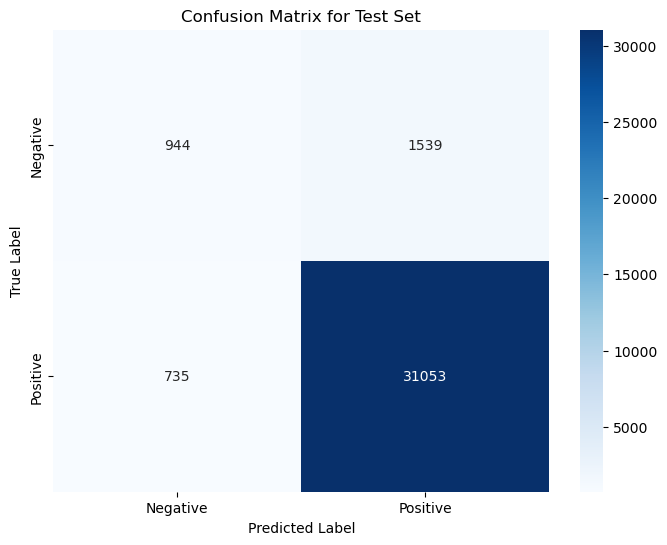

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(actual_labels, predicted_classes_test)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Set')
plt.show()


In [ ]:
embedding_model.save('initial_model_simple')

INFO:tensorflow:Assets written to: initial_model\assets


INFO:tensorflow:Assets written to: initial_model\assets


In [ ]:
tf.saved_model.save(embedding_model, 'initial_model_full_simple')

INFO:tensorflow:Assets written to: initial_model_full\assets


INFO:tensorflow:Assets written to: initial_model_full\assets
